# Conclusiones del análisis de los Juegos Olímpicos

Este notebook recoge las principales conclusiones del análisis exploratorio realizado sobre la historia de los Juegos Olímpicos, con el objetivo de sintetizar los resultados obtenidos y facilitar su explicación oral. El análisis se estructura en torno a tres hipótesis principales: el impacto de las Guerras Mundiales, la evolución por franjas históricas y el estudio de Alemania como potencia olímpica.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
jjoo = pd.read_csv("../DATA/jjoo_limpio.csv")

### Hipotesis 1 Impacto de las Guerras Mundiales en la participación y el medallero

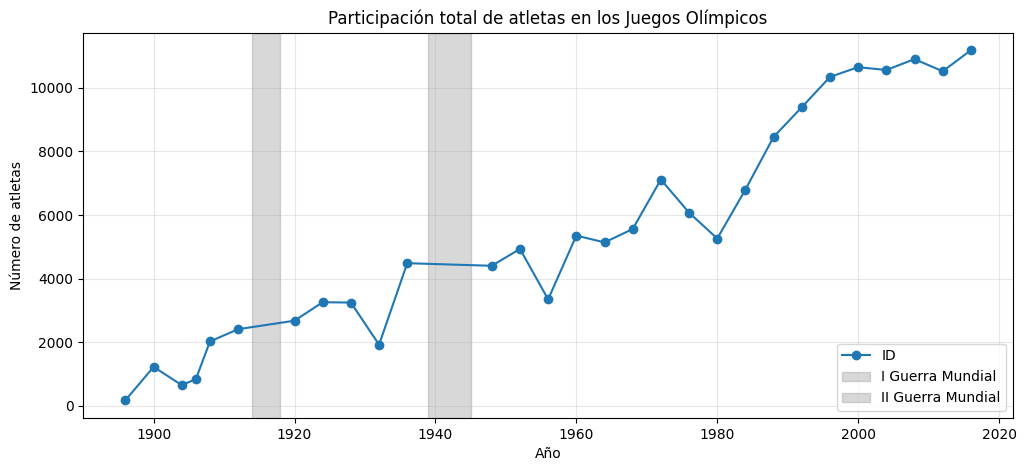

In [8]:
athletes_year = jjoo.groupby("Year")["ID"].nunique()



plt.figure(figsize=(12,5))
athletes_year.plot(marker="o")
plt.axvspan(1914, 1918, color="grey", alpha=0.3, label="I Guerra Mundial")
plt.axvspan(1939, 1945, color="grey", alpha=0.3, label="II Guerra Mundial")
plt.title("Participación total de atletas en los Juegos Olímpicos")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

El análisis de la participación y el medallero olímpico a lo largo del tiempo muestra que las Guerras Mundiales tuvieron un impacto profundo y estructural en los Juegos Olímpicos. A diferencia de otros descensos puntuales, estos conflictos provocaron la cancelación total de ediciones, la exclusión explícita de países derrotados y una ruptura clara en la continuidad del evento olímpico.

Tras la Primera Guerra Mundial, la exclusión de potencias como Alemania y sus aliados en las ediciones de 1920 y 1924 alteró significativamente el equilibrio competitivo, favoreciendo a países no sancionados, que incrementaron su presencia y su peso en el medallero. De forma similar, tras la Segunda Guerra Mundial, la ausencia de Alemania y Japón en 1948 generó una redistribución del rendimiento olímpico, beneficiando a otras potencias emergentes.

Estos efectos no se limitan únicamente a la participación, sino que también se reflejan en el número de medallas obtenidas, evidenciando que los conflictos bélicos afectan tanto al volumen de atletas como a la competencia deportiva. En conjunto, los resultados confirman que las Guerras Mundiales supusieron rupturas estructurales en el sistema olímpico, y no simples fluctuaciones coyunturales.


## Hipotesis 2 Evolución de los Juegos Olímpicos por franjas históricas

C:\Users\lupep\AppData\Local\Temp\ipykernel_18484\3094909766.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Historical_Period")["ID"]


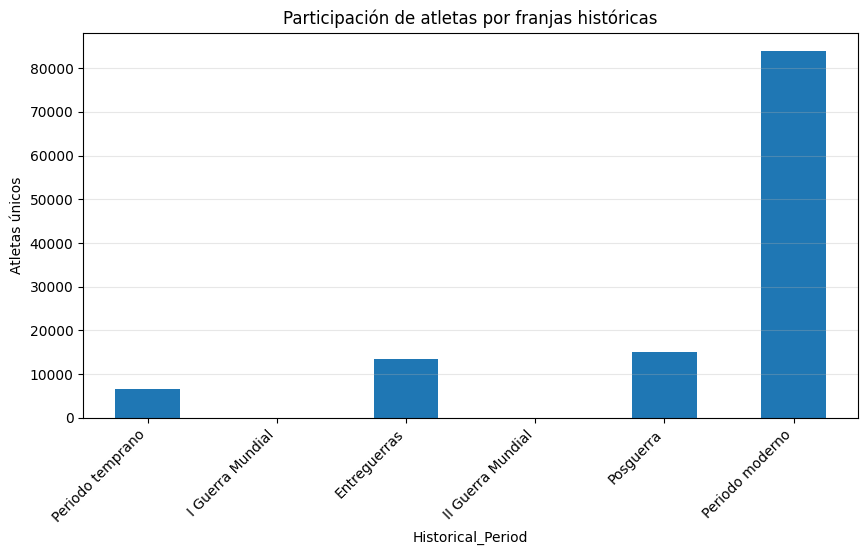

In [9]:
bins = [1890, 1912, 1918, 1938, 1945, 1960, 2020]
labels = [
    "Periodo temprano",
    "I Guerra Mundial",
    "Entreguerras",
    "II Guerra Mundial",
    "Posguerra",
    "Periodo moderno"
]

jjoo["Historical_Period"] = pd.cut(jjoo["Year"], bins=bins, labels=labels)

athletes_by_period = (
    jjoo
    .groupby("Historical_Period")["ID"]
    .nunique()
)

athletes_by_period.plot(kind="bar", figsize=(10,5))
plt.title("Participación de atletas por franjas históricas")
plt.ylabel("Atletas únicos")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

El estudio de los Juegos Olímpicos por franjas históricas permite identificar etapas claramente diferenciadas en su evolución. En el periodo temprano, los Juegos presentan una participación limitada y un carácter marcadamente elitista, con un reducido número de países y una fuerte concentración del medallero en unas pocas naciones.

El periodo de entreguerras refleja una recuperación progresiva tras la Primera Guerra Mundial, aunque todavía vulnerable a factores externos como la inestabilidad política y la Gran Depresión, que se traduce en descensos significativos de participación, especialmente en ediciones como la de 1932. En estos casos, la caída no responde a conflictos bélicos directos, sino a condicionantes económicos y geográficos, como la localización de los Juegos y las dificultades de desplazamiento internacional.

Tras la Segunda Guerra Mundial, los Juegos Olímpicos entran en una fase de reconstrucción y expansión sostenida, con la incorporación de nuevos países y una mayor regularidad en la participación. A partir del periodo moderno, el crecimiento se vuelve estructural y continuo, incluso en presencia de perturbaciones políticas como los boicots de la Guerra Fría. Estos boicots, especialmente en la década de 1980, generan descensos puntuales en la participación, pero no llegan a romper la tendencia general de consolidación del sistema olímpico.

En conjunto, el análisis por franjas históricas muestra que los Juegos Olímpicos evolucionan desde un evento frágil y discontinuo hacia una institución global robusta, capaz de absorber crisis políticas y económicas sin comprometer su continuidad a largo plazo.

## Hipotesis 3 Alemania como potencia olímpica: deporte, política e historia

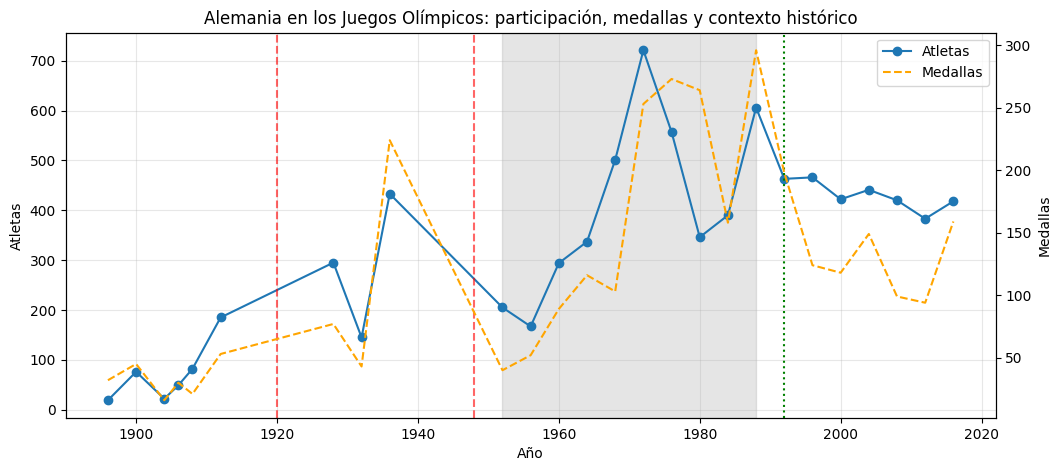

In [10]:
germany_all = jjoo[jjoo["NOC"].isin(["GER", "FRG", "GDR"])]

athletes_germany = germany_all.groupby("Year")["ID"].nunique()
medals_germany = germany_all[germany_all["Medal"] != "NoM"].groupby("Year")["Medal"].count()

fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(athletes_germany.index, athletes_germany.values, marker="o", label="Atletas")
ax1.set_ylabel("Atletas")
ax1.set_xlabel("Año")
ax1.grid(alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(medals_germany.index, medals_germany.values, linestyle="--", color="orange", label="Medallas")
ax2.set_ylabel("Medallas")

# Eventos clave
ax1.axvline(1920, color="red", linestyle="--", alpha=0.6)
ax1.axvline(1948, color="red", linestyle="--", alpha=0.6)
ax1.axvspan(1952, 1988, color="grey", alpha=0.2)
ax1.axvline(1992, color="green", linestyle=":")

plt.title("Alemania en los Juegos Olímpicos: participación, medallas y contexto histórico")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

plt.show()

El análisis histórico de Alemania como potencia olímpica pone de manifiesto la estrecha relación entre el rendimiento deportivo y el contexto político del siglo XX. Alemania se consolida tempranamente como una de las principales potencias olímpicas, pero su trayectoria se ve interrumpida de forma abrupta tras las dos Guerras Mundiales, con exclusiones totales en varias ediciones que reflejan las sanciones internacionales impuestas al país.

Durante el periodo de Alemania dividida, el deporte adquiere un fuerte componente ideológico. La coexistencia de la RFA y la RDA genera dos modelos deportivos diferenciados, destacando especialmente el rendimiento de la Alemania Oriental, que alcanza una elevada eficiencia en términos de medallas por atleta. Este comportamiento es coherente con un sistema deportivo altamente dirigido y orientado al rendimiento en el contexto de la Guerra Fría.

Tras la reunificación en 1992, Alemania vuelve a competir como una única delegación, manteniendo una participación elevada y un rendimiento competitivo estable. Sin embargo, desaparecen los picos extremos observados durante el periodo de división, lo que sugiere una transición hacia un modelo deportivo más equilibrado y sostenible. En conjunto, Alemania constituye un caso de estudio paradigmático de cómo los cambios políticos y geopolíticos influyen directamente en la participación y el rendimiento olímpico.